In [1]:
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import f1_score, plot_precision_recall_curve, precision_score, recall_score, plot_roc_curve

import pandas as pd

In [2]:
data_dir = "./titanic"
data_path = os.path.join(data_dir, "train.csv")

dataframe = pd.read_csv(data_path)
print(dataframe.shape)
dataframe.head(20)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# checking null data. They have to be removed/filled
dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# taking median of age and put it into NaN ages
dataframe['Age'].fillna(dataframe['Age'].median(), inplace=True)
# putting most occuring element in Nan places
dataframe['Embarked'].fillna(dataframe['Embarked'].mode()[0], inplace=True)
# Family Size new feature to describe if someone is alone or not
dataframe['Family_size'] = dataframe['Parch'] + dataframe['SibSp'] + 1
display(dataframe.isnull().sum())
# base statistics about data
dataframe.describe()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Family_size      0
dtype: int64

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


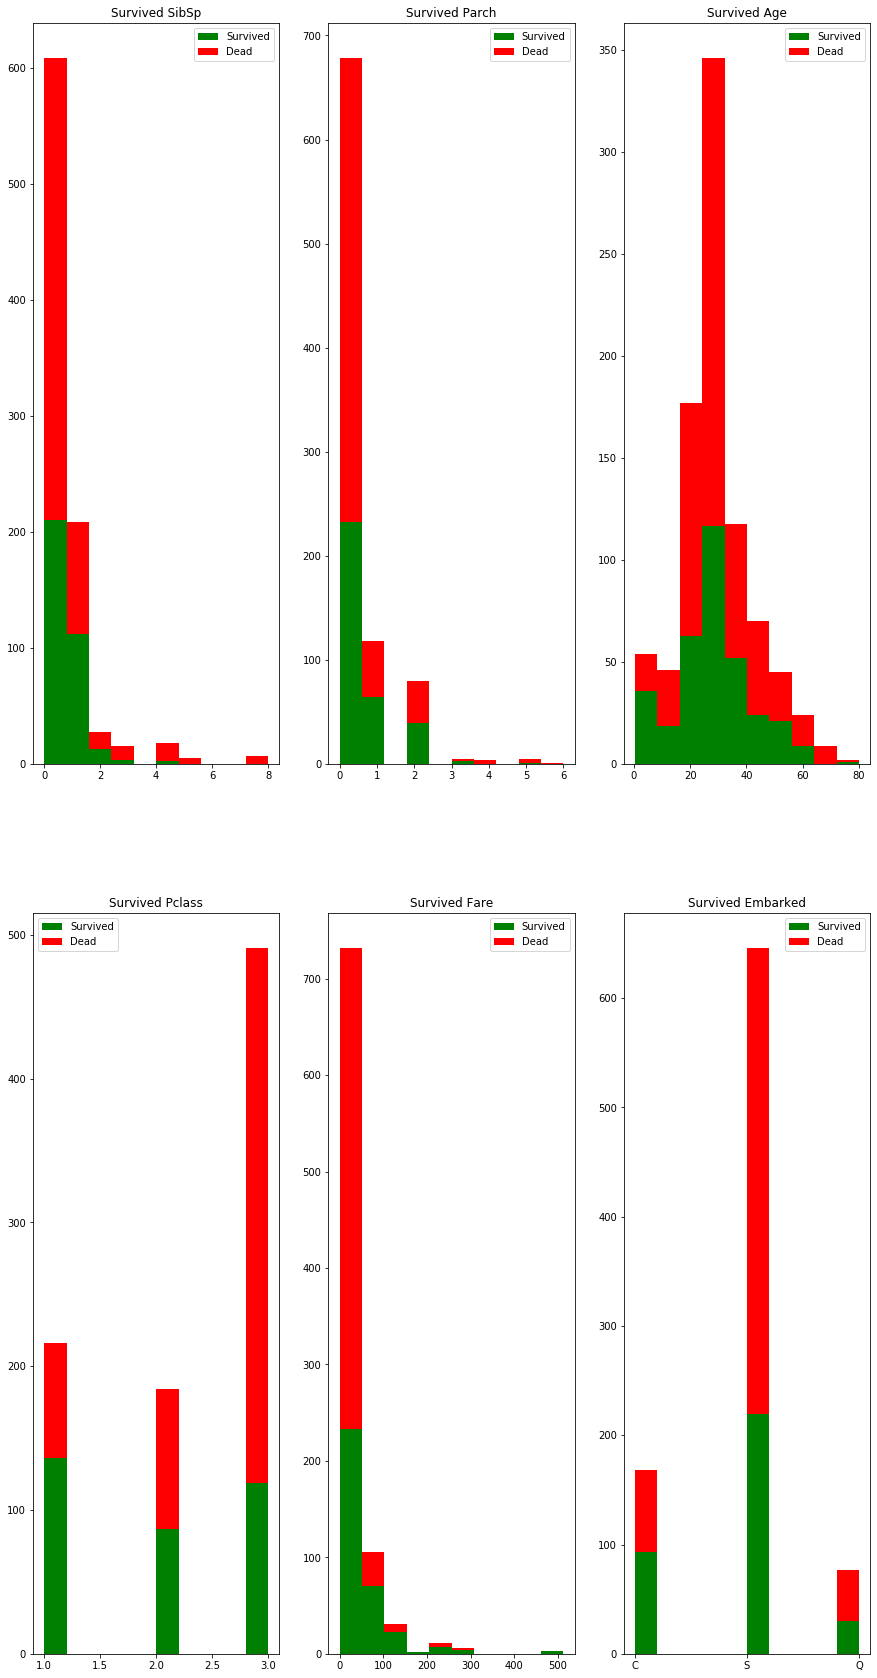

In [5]:
# plotting of Sirvived/Dead based on other features
# to check what i connected with Survived/Dead

plt.figure(figsize=(15,30))
plt.subplot(231)
plt.hist(x = [dataframe[dataframe['Survived']==1]['SibSp'], dataframe[dataframe['Survived']==0]['SibSp']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title("Survived SibSp")
plt.legend()

plt.subplot(232)
plt.hist(x = [dataframe[dataframe['Survived']==1]['Parch'], dataframe[dataframe['Survived']==0]['Parch']],
        stacked=True, color = ['g','r'], label=['Survived', 'Dead'])
plt.title("Survived Parch")
plt.legend()

plt.subplot(233)
plt.hist(x = [dataframe[dataframe['Survived']==1]['Age'], dataframe[dataframe['Survived']==0]['Age']],
        stacked=True, color = ['g','r'], label=['Survived', 'Dead'])
plt.title("Survived Age")
plt.legend()

plt.subplot(234)
plt.hist(x = [dataframe[dataframe['Survived']==1]['Pclass'], dataframe[dataframe['Survived']==0]['Pclass']],
        stacked=True, color = ['g','r'], label=['Survived', 'Dead'])
plt.title("Survived Pclass")
plt.legend()

plt.subplot(235)
plt.hist(x = [dataframe[dataframe['Survived']==1]['Fare'], dataframe[dataframe['Survived']==0]['Fare']],
        stacked=True, color = ['g','r'], label=['Survived', 'Dead'])
plt.title("Survived Fare")
plt.legend()

plt.subplot(236)
plt.hist(x = [dataframe[dataframe['Survived']==1]['Embarked'], dataframe[dataframe['Survived']==0]['Embarked']],
        stacked=True, color = ['g','r'], label=['Survived', 'Dead'])
plt.title("Survived Embarked")
plt.legend()

In [6]:
# Embarked, Name, Ticket, Cabin  doesn`t count for propability becuase person is on the ship
# TODO: From Ticket/ Fare --> regression get Cabin/Deck level
dataframe.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
dataframe.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,1.904602
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


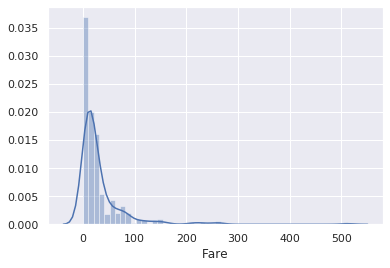

In [7]:
sns.set()
sns.distplot(dataframe['Fare'])

In [8]:
# putting ages/Fare into bins ( Quick analysis, can be done better with customized bins, for example by looking deeply at Fare [0, 100])
print(dataframe['Age'].max())
dataframe['Age'] = pd.cut(dataframe['Age'], bins=10, labels=(1,2,3,4,5,6,7,8,9,10))
dataframe['Fare'] = pd.cut(dataframe['Fare'], bins=[-1., 10., 20., 30., 40., 50., 60., 70., 80., 100., 150., 200., 250., 513.], labels = (1,2,3,4,5,6,7,8,9,10,11,12,13))
# replacing string s with numerical data (easier to process by computer)
dataframe['Sex'].replace({'male':1, 'female':0}, inplace=True)
dataframe['Embarked'].replace({'S':0, 'Q':1, 'C':2}, inplace=True)

80.0


In [9]:
# printing survival mean based on given Feature
for x in dataframe:
    if x == 'Survived':
        continue
    print("Survival chance by: ", x, " ", dataframe[x].dtype)
    display(dataframe[[x, 'Survived']].groupby(x, as_index=True).mean().sort_values(by='Survived', ascending=False))
    

Survival chance by:  Pclass   int64


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Survival chance by:  Sex   int64


,Survived
Sex,
0,0.742038
1,0.188908


Survival chance by:  Age   category


,Survived
Age,
1,0.666667
10,0.500000
7,0.466667
5,0.440678
2,0.413043
8,0.375000
3,0.355932
6,0.342857
4,0.338150


Survival chance by:  SibSp   int64


,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


Survival chance by:  Parch   int64


,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


Survival chance by:  Fare   category


,Survived
Fare,
9,0.857143
10,0.791667
13,0.777778
6,0.710526
11,0.666667
12,0.636364
8,0.612903
3,0.443662
2,0.424581


Survival chance by:  Embarked   int64


,Survived
Embarked,
2,0.553571
1,0.389610
0,0.339009


Survival chance by:  Family_size   int64


,Survived
Family_size,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [10]:
# splitting Data/ target
targets = dataframe['Survived']
dataframe.drop(columns=['Survived'], inplace=True)
dataframe.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,3,1,3,1,0,1,0,2
1,1,0,5,1,0,8,2,2
2,3,0,4,0,0,1,0,1
3,1,0,5,1,0,6,0,2
4,3,1,5,0,0,1,0,1


In [11]:
# last NaN check
display(dataframe.isnull().sum())

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [23]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(dataframe, targets, shuffle=True, test_size=0.1)

In [24]:
display(X_train.head())
display(X_train.describe())
display(X_train.isnull().sum())
display(X_test.head())
display(X_test.describe())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
563,3,1,4,0,0,1,0,1
543,2,1,4,1,0,3,0,2
841,2,1,2,0,0,2,0,1
797,3,0,4,0,0,1,0,1
697,3,0,4,0,0,1,1,1


,Pclass,Sex,SibSp,Parch,Embarked,Family_size
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,2.298377,0.645443,0.500624,0.372035,0.468165,1.872659
std,0.834931,0.478678,1.060807,0.807104,0.796428,1.569638
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,1.000000,0.000000,1.000000,2.000000
max,3.000000,1.000000,8.000000,6.000000,2.000000,11.000000


Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Family_size    0
dtype: int64

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
639,3,1,4,1,0,2,0,2
217,2,1,6,1,0,3,0,2
778,3,1,4,0,0,1,1,1
821,3,1,4,0,0,1,0,1
351,1,1,4,0,0,4,0,1


,Pclass,Sex,SibSp,Parch,Embarked,Family_size
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,2.400000,0.666667,0.722222,0.466667,0.422222,2.188889
std,0.845344,0.474045,1.414434,0.796058,0.749198,1.948174
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000
max,3.000000,1.000000,8.000000,4.000000,2.000000,11.000000


                                        DECISION TREES
                                            MANUAL
                                        FEATURES SETTING

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
GINI
f1 score   0.6071428571428571
precision  0.6071428571428571
recall     0.6071428571428571


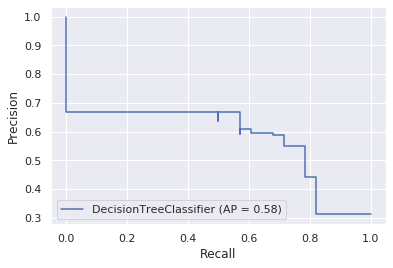

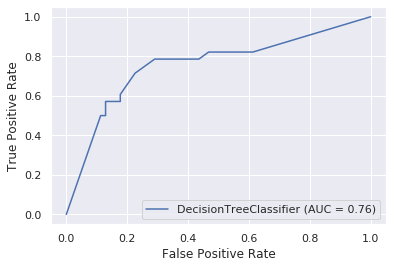

In [25]:
decisionTreeGigni = DecisionTreeClassifier(criterion='gini')
print(decisionTreeGigni)

decisionTreeGigni.fit(X_train, y_train)
predictions = decisionTreeGigni.predict(X_test)

print("GINI")
print("f1 score  ", f1_score(predictions, y_test))
print("precision ", precision_score(predictions, y_test))
print("recall    ", recall_score(predictions, y_test))
plot_precision_recall_curve(decisionTreeGigni, X_test, y_test)
plot_roc_curve(decisionTreeGigni, X_test, y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Entropy
f1 score   0.6779661016949152
precision  0.7142857142857143
recall     0.6451612903225806


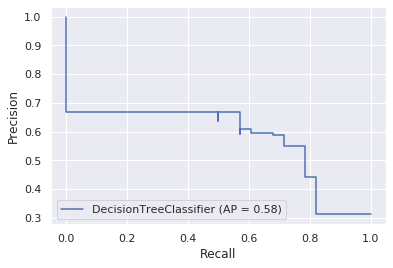

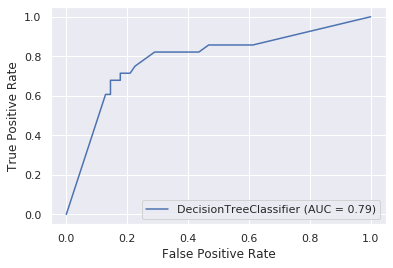

In [26]:
decisionTreeEntropy = DecisionTreeClassifier(criterion='entropy')
print(decisionTreeEntropy)

decisionTreeEntropy.fit(X_train, y_train)
predictions = decisionTreeEntropy.predict(X_test)

print("Entropy")
print("f1 score  ", f1_score(predictions, y_test))
print("precision ", precision_score(predictions, y_test))
print("recall    ", recall_score(predictions, y_test))
plot_precision_recall_curve(decisionTreeGigni, X_test, y_test)
plot_roc_curve(decisionTreeEntropy, X_test, y_test)

                                        DECISION TREES
                                             AUTO
                                        FEATURES SETTING

In [27]:
grid_parameters = {'max_depth':[2, 3,4,5,6,7,8,9,10],
                   'min_samples_split':[2,4,6,8,10],
                   'min_samples_leaf':[1,2,4,6,8,10],
                   'max_features':['auto', 'sqrt', 'log2', None],
                   'criterion':['gini', 'entropy']}


In [28]:
decision_tree = DecisionTreeClassifier()
grid_DT = GridSearchCV(decision_tree, param_grid=grid_parameters, verbose=1)
grid_DT.fit(X_train, y_train)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10800 out of 10800 | elapsed:  1.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [29]:
best_params = grid_DT.best_params_
display(best_params)

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 6}

Entropy
f1 score   0.6071428571428571
precision  0.6071428571428571
recall     0.6071428571428571


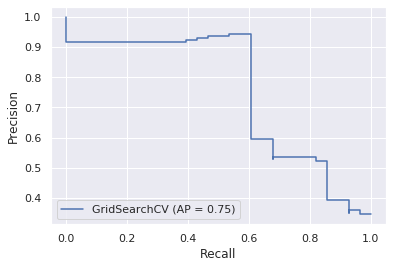

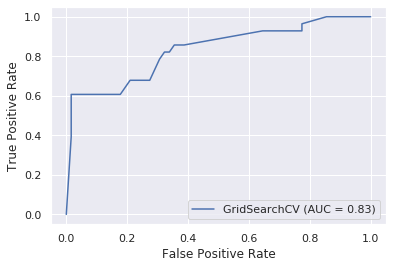

In [30]:
predictions = grid_DT.predict(X_test)

print("Entropy")
print("f1 score  ", f1_score(predictions, y_test))
print("precision ", precision_score(predictions, y_test))
print("recall    ", recall_score(predictions, y_test))
plot_precision_recall_curve(grid_DT, X_test, y_test)
plot_roc_curve(grid_DT, X_test, y_test)

                                        DECISION TREES
                                            MANUAL
                                        FEATURES SETTING
                                  WITH PRECISION AS MAIN METRIC

In [31]:
from sklearn.metrics import make_scorer

scores = {'Precision': make_scorer(precision_score), 'f1': make_scorer(f1_score)}
decision_tree_scorer = DecisionTreeClassifier()
grid_DT_scorer = GridSearchCV(decision_tree,
                              param_grid=grid_parameters,
                              scoring=scores,
                              refit='Precision',
                              return_train_score=True,
                              verbose=1)
grid_DT_scorer.fit(X_train, y_train)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10800 out of 10800 | elapsed:  2.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid=...obs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 2}

Entropy
f1 score   0.6
precision  0.5357142857142857
recall     0.6818181818181818


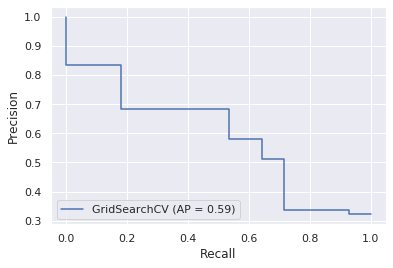

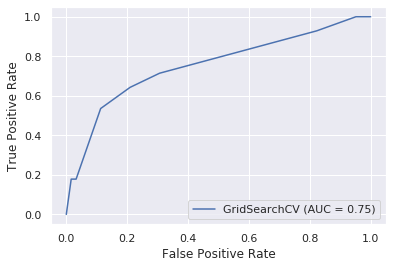

In [32]:
best_params = grid_DT_scorer.best_params_
display(best_params)

predictions = grid_DT_scorer.predict(X_test)

print("Entropy")
print("f1 score  ", f1_score(predictions, y_test))
print("precision ", precision_score(predictions, y_test))
print("recall    ", recall_score(predictions, y_test))
plot_precision_recall_curve(grid_DT_scorer, X_test, y_test)
plot_roc_curve(grid_DT_scorer, X_test, y_test)

DECISION TREES OVERFITTS SO MUCH
TO check: 
- SVM
- Random Forests
- XGBoost
- AdaBoost
- ensembling of above
- With gridSearch
- KFold (with gridsearch is by default)

                                        RANDOM FORESTS
                                             AUTO
                                  WITH PRECISION AS MAIN METRIC

In [ ]:
forsets_grid_parameters = {'n_estimators':[100],
                            'max_depth':[2, 3,4,5,6,7,8,9,10],
                            'min_samples_split':[2,4,6,8,10],
                            'min_samples_leaf':[1,2,4,6,8,10],
                            'max_features':['auto', 'sqrt', 'log2', None],
                            'criterion':['gini', 'entropy'],
                            'bootstrap':[True, False],
                            'oob_score':[True, False]}

scores = {'Precision': make_scorer(precision_score), 'f1': make_scorer(f1_score)}
forests_scorer = RandomForestClassifier()
grid_forest = GridSearchCV(forests_scorer,
                              param_grid=forsets_grid_parameters,
                              scoring=scores,
                              refit='Precision',
                              return_train_score=True,
                              verbose=1,
                              n_jobs=1)    # change to -1 if wanna use all available CPUs
grid_forest.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
best_params = grid_forest.best_params_
display(best_params)

predictions = grid_forest.predict(X_test)

print("Entropy")
print("f1 score  ", f1_score(predictions, y_test))
print("precision ", precision_score(predictions, y_test))
print("recall    ", recall_score(predictions, y_test))
plot_precision_recall_curve(grid_forest, X_test, y_test)
plot_roc_curve(grid_forest, X_test, y_test)